In [1]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltrated

In [2]:
equifax_baseline_data = ingest_experiment_results(path.join('data', 'EquifaxBaseline'))

In [3]:
equifax_baseline_data_exfiltrated = get_data_exfiltrated(equifax_baseline_data)
time_exiltrated_all_data = []

for experiment_result in equifax_baseline_data_exfiltrated:
    data_exfiltration_times = []
    for data_exfiltrated in experiment_result:
        data_exfiltration_times.append(data_exfiltrated.time_exfiltrated)

    time_exiltrated_all_data.append(max(data_exfiltration_times))

In [8]:
# Percent of experiments all data exfiltrated
Equifax_total_data = 2

experiments_that_exfiltrate_all_data = []
for data_exfiltrated in equifax_baseline_data_exfiltrated:
    if len(data_exfiltrated) == Equifax_total_data:
        experiments_that_exfiltrate_all_data.append(1)

percent_exfiltrated_all_data = sum(experiments_that_exfiltrate_all_data) / len(experiments_that_exfiltrate_all_data) * 100

print("Percent of experiments all data exfiltrated: ", percent_exfiltrated_all_data)

Percent of experiments all data exfiltrated:  100.0


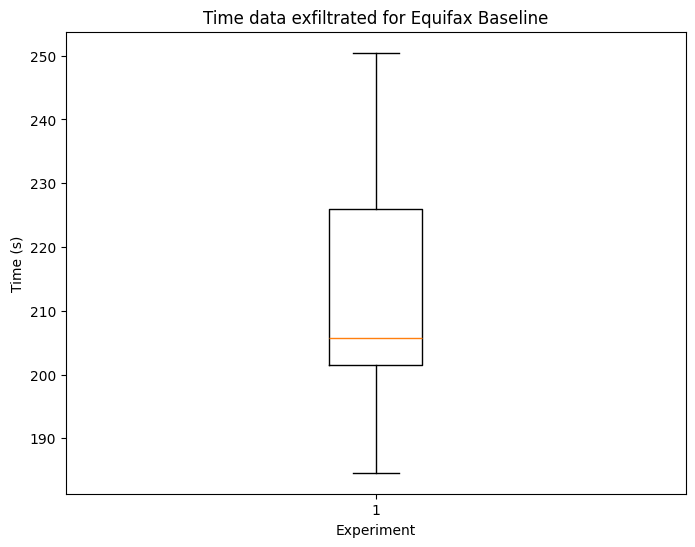

In [15]:
# Box-plot average time data exfiltrated
plt.figure(figsize=(8, 6))
plt.boxplot(time_exiltrated_all_data)
plt.ylabel('Time (s)')
plt.xlabel('Experiment')
plt.title('Time data exfiltrated for Equifax Baseline')
plt.show()